<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2015-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis
### Joel Gómez Uribe
---

<h1 align="center" font-weight="bold">Tarea-Práctica 6. <br>Métodos numéricos básicos en física computacional</h1> 
<h2 align="center">Diferenciación numérica</h2> 
<hr>

In [1]:
import math as mt
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
})

<h2>1. Diferenciación numérica</h2>

Crea una función por el usuario $f(x)$ dque devuelva el valor $1 + \tfrac{1}{2}\tanh(2x)$, luego usa una <strong>diferencia central</strong> para calcular la derivada de la función en el rango $-2 \leq x \leq 2$. Calcula la derivada analíticamente y haz una gráfica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta como líneas y la númerica como puntos. (Hint: usa la función ``tanh`` del paquete ``math``).

In [2]:
f = lambda x: 1 + 0.5 * (mt.tanh(2 * x))
df = lambda x: (1 / mt.cosh(2 * x)) ** 2

def diferencia_central(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

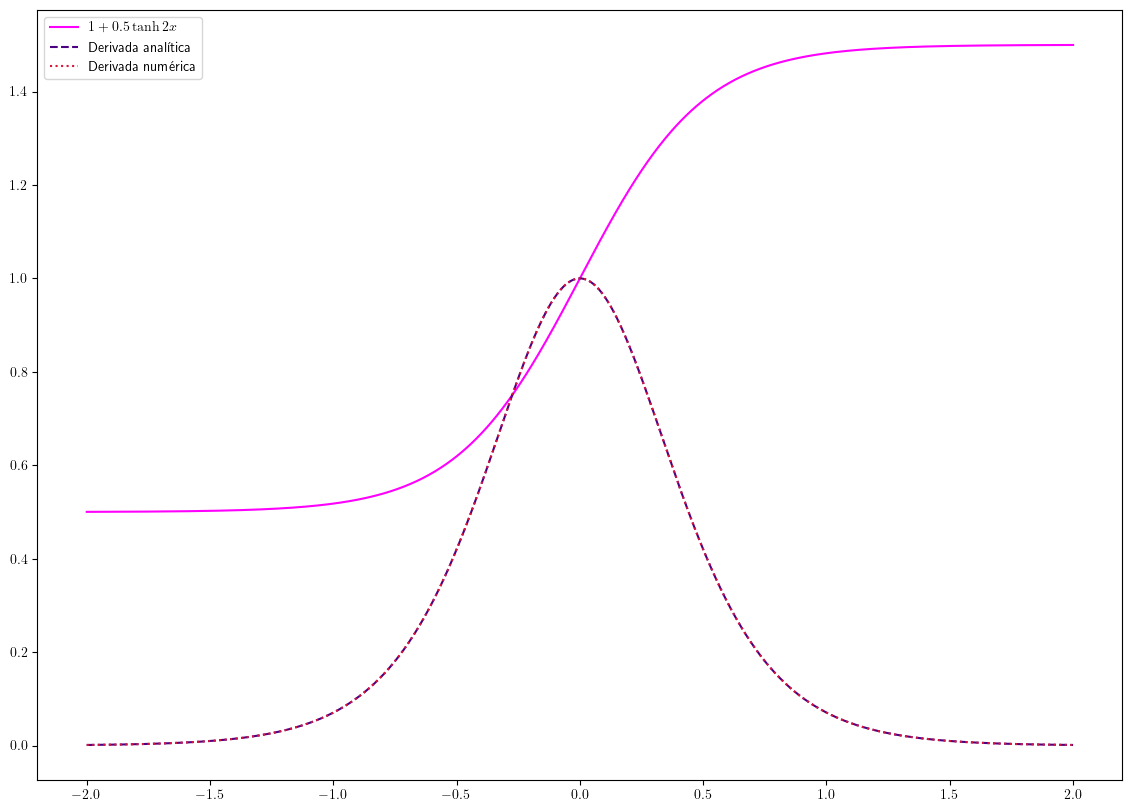

In [3]:
h = 1e-10
x = np.linspace(-2, 2, 1000)
fx = [f(i) for i in x] # Puntos de la función
fx_anal = [df(i) for i in x] # Puntos de la derivada analítica
fx_num = [diferencia_central(f, i, h) for i in x] # Puntos de la derivada numérica


plt.figure(figsize=(14, 10))
plt.plot(x, fx, color="magenta", label=r"$1 + 0.5\tanh{2x}$")
plt.plot(x, fx_anal, '--', color="indigo", label="Derivada analítica")
plt.plot(x, fx_num, ":", color="crimson", label="Derivada numérica")
plt.legend()
plt.show()

<h2>2. Campo eléctrico de una distribución de cargas</h2>

<h3>(a)</h3>

<h3>(b)</h3>

<h3>(c)</h3>

<h2>3. Procesamiento de imágenes y STM</h2>

<h3>(a) Cálculo de derivadas</h3>

In [102]:
altitudes = np.loadtxt("altitudes.txt") # w(x, y)

In [103]:
def diferenciacion_datos(data, h):
    # Prelocalización de arreglos
    Dx = np.zeros(data.shape)
    Dy = np.zeros_like(Dx)
    Y, X = Dx.shape # Renglones, Columnas

    # Cálculo de las derivadas sin considerar las fronteras
    for y in range(1, Y - 1):
        for x in range(1, X - 1):
            Dx[y, x] = (data[y, x + 1] - data[y, x - 1]) / (2 * h)
            Dy[y, x] = (data[y + 1, x] - data[y - 1, x]) / (2 * h)
    
    # Derivadas en las fronteras
    # Bordes superior e inferior para Dx
    for x in range(X):
        Dx[0, x] = (data[0, x + 1] - data[0, x]) / h if x < X - 1 \
        else (data[0, x] - data[0, x - 1]) / h
        Dx[Y - 1, x] = (data[Y - 1, x + 1] - data[Y - 1, x]) / h if x < X - 1 \
        else (data[Y - 1, x] - data[Y - 1, x - 1]) / h
    
    # Bordes izquierdo y derecho para Dy
    for y in range(Y):
        Dy[y, 0] = (data[y + 1, 0] - data[y, 0]) / h if y < Y - 1 \
        else (data[y, 0] - data[y - 1, 0]) / h
        Dy[y, X - 1] = (data[y + 1, X - 1] - data[y, X - 1]) / h if y < Y - 1 \
        else (data[y, X - 1] - data[y - 1, X - 1]) / h

    return Dx, Dy

In [104]:
h = 3e4 # 30000 m
Dx, Dy = diferenciacion_datos(altitudes, h)

<h3>(b) Cálculo de la intensidad para $\phi = \tfrac{\pi}{4}$</h3>

In [105]:
# Intensidad de iluminación
def I(Dx, Dy, ang=np.pi/4):
    return (np.cos(ang) * Dx + np.sin(ang) * Dy) \
    / np.sqrt(Dx ** 2 + Dy ** 2 + 1)

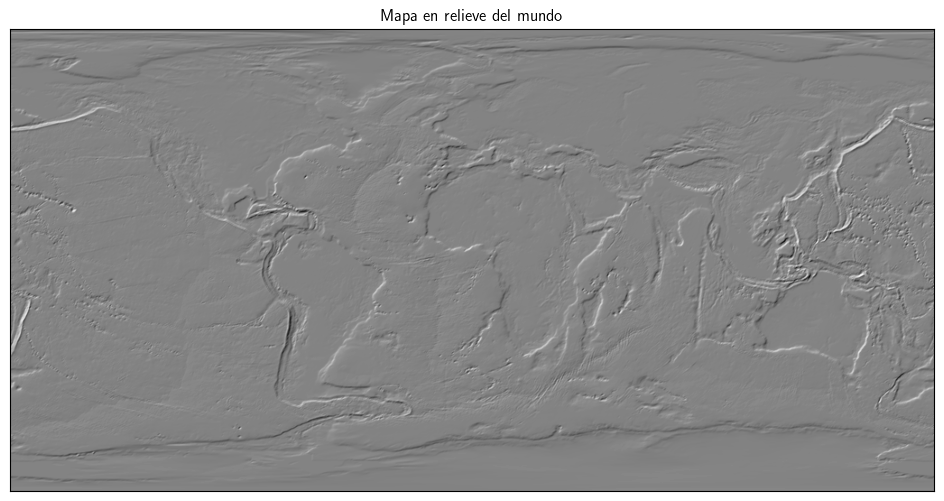

In [108]:
plt.figure(figsize=(14, 6))
plt.imshow(I(Dx, Dy), cmap="Greys")
plt.title("Mapa en relieve del mundo")
plt.xticks([])
plt.yticks([])

plt.show()

<h3>(c) STM</h3>

In [109]:
stm = np.loadtxt("stm.txt")

In [110]:
h = 2.5 # unidades arbitrarias
Dx, Dy = diferenciacion_datos(stm, h)

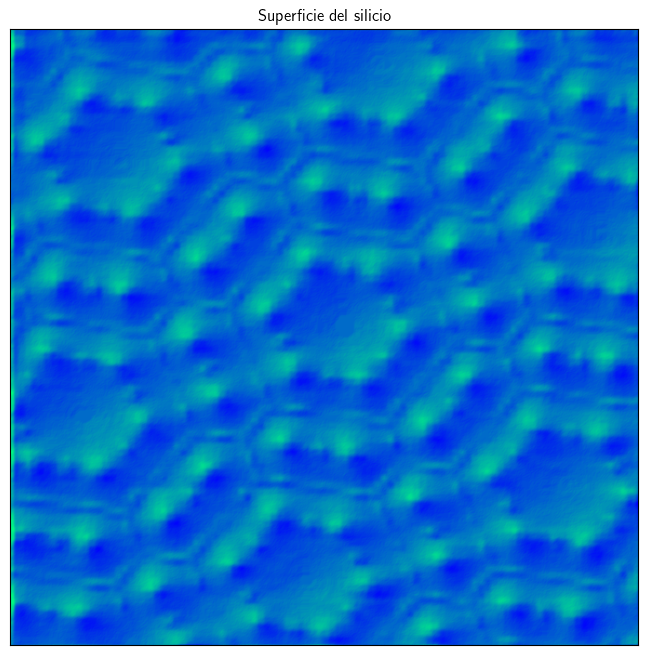

In [118]:
plt.figure(figsize=(12, 8))
plt.imshow(I(Dx, Dy), cmap="winter")
plt.title("Superficie del silicio")
plt.xticks([])
plt.yticks([])
plt.show()